**Table of contents**<a id='toc0_'></a>    
- [Table of Contents](#toc1_)    
- [Introduction](#toc2_)    
- [Load Packages](#toc3_)    
- [Dataset](#toc4_)    
  - [Load Data](#toc4_1_)    
  - [Data summary](#toc4_2_)    
- [Data Cleaning and Preprocessing](#toc5_)    
  - [JSON Handling](#toc5_1_)    
  - [Zero Values](#toc5_2_)    
  - [Released Date](#toc5_3_)    
  - [Feature Selection](#toc5_4_)    
  - [Missing Values](#toc5_5_)    
- [Exploratory Data Analysis (EDA)](#toc6_)    
- [Data Modeling](#toc7_)    
  - [Models](#toc7_1_)    
  - [Evaluation](#toc7_2_)    
- [Recommender System](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Introduction](#toc0_)

The Movie Profitability Prediction project aims to analyze a dataset containing information about various movies to predict their profitability. The dataset, sourced from TMDB (The Movie Database) via [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data), includes a wide range of features such as budget, revenue, genres, keywords, cast, crew, production companies, and more. The primary objective is to develop machine learning models that can predict whether a movie will be profitable or not based on its features.

# <a id='toc3_'></a>[Load Packages](#toc0_)

In [1]:
import os
import json
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve

In [3]:
import warnings
warnings.filterwarnings("ignore")

# <a id='toc4_'></a>[Dataset](#toc0_)

## <a id='toc4_1_'></a>[Load Data](#toc0_)

In [4]:
data_path = '../data'

In [5]:
movies_df = pd.read_csv(os.path.join(data_path, 'tmdb_5000_movies.csv'))
credits_df = pd.read_csv(os.path.join(data_path, 'tmdb_5000_credits.csv'))

**Movies Dataset (movies_df):**

This dataset contains information about various movies, including their budget, genres, homepage, keywords, original language, title, overview, popularity, production companies, production countries, release date, revenue, runtime, spoken languages, status, tagline, vote average, and vote count.

- `budget`: The budget allocated for the movie production.
- `genres`: The genres of the movie (e.g., action, comedy, drama).
- `homepage`: The URL of the movie's homepage.
- `id`: Unique identifier for the movie.
- `keywords`: The keywords or tags related to the movie.
- `original_language`: The original language of the movie.
- `original_title`: The original title of the movie (before translation or adaptation).
- `overview`: A brief description or summary of the movie.
- `popularity`: A numeric quantity specifying the movie popularity.
- `production_companies`: The production companies involved in making the movie.
- `production_countries`: The countries where the movie was produced.
- `release_date`: The release date of the movie.
- `revenue`: The worldwide revenue generated by the movie.
- `runtime`: The duration of the movie in minutes.
- `spoken_languages`: The languages spoken in the movie.
- `status`: The status of the movie (e.g., Released, Rumored).
- `tagline`: A tagline or slogan associated with the movie.
- `title`: The title of the movie.
- `vote_average`: The average rating given to the movie by users.
- `vote_count`: The number of votes cast for the movie.

**Credits Dataset (credits_df):**

This dataset contains information about movie credits, including the movie ID, title, cast, and crew.

- `movie_id`: Unique identifier for the movie.
- `title`: The title of the movie.
- `cast`: Information about the cast members (e.g., actors, actresses) involved in the movie.
- `crew`: Information about the crew members (e.g., directors, producers, writers) involved in the movie.

These datasets provide valuable insights into the characteristics of movies, their production details, and the people involved in their creation. Analyzing these datasets together can help in understanding factors influencing movie success and building recommendation systems based on movie attributes and credits.

## <a id='toc4_2_'></a>[Data summary](#toc0_)

In [6]:
# Check dimensions of the dataset
print("Dimensions of the movies dataset:", movies_df.shape)
print("Dimensions of the credits dataset:", credits_df.shape)

Dimensions of the movies dataset: (4803, 20)
Dimensions of the credits dataset: (4803, 4)


In [14]:
# Display the first few rows of the movies dataset
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [35]:
# Display the first few rows of the credits dataset
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [230]:
print('ID\n', (credits_df['movie_id']==movies_df['id']).describe(), '\n')
print('Title\n', (credits_df['title']==movies_df['title']).describe())

ID
 count     4803
unique       1
top       True
freq      4803
dtype: object 

Title
 count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object


Given the findings from the comparisons of this two dataset, I proceeded to merge the two DataFrames, `movies_df` and `credits_df`, using an inner join based on the 'id' and 'title' columns. The merged DataFrame, named `merged_df`, contains information from both DataFrames. Since the 'movie_id' and 'id' columns contained the same values, I dropped the 'movie_id' column after merging to avoid redundancy.

In [7]:
# Merge the two datasets on the 'id' and 'movie_id' columns, and 'title' and 'original_title' columns respectively
merged_df = pd.merge(movies_df, credits_df, left_on=['id', 'title'],
                     right_on=['movie_id', 'title'], how='inner')

# Drop the 'movie_id' column after merging
merged_df.drop(columns=['movie_id'], inplace=True)

In [91]:
# Display the first few rows of the merged dataset
merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
# Check dimensions of the dataset
print("Dimensions of the dataset after merging:", merged_df.shape)

Dimensions of the dataset after merging: (4803, 22)


In [46]:
# Print information about the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [10]:
# Check for missing values
merged_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [52]:
# Check for duplicated values
merged_df.duplicated().sum()

0

# <a id='toc5_'></a>[Data Cleaning and Preprocessing](#toc0_)

## <a id='toc5_1_'></a>[JSON Handling](#toc0_)

To handle columns in JSON format (genres, keywords, production_countries, production_companies, spoken_languages, cast, crew), I use the json module in Python to parse the JSON strings into Python objects (lists). 

In [11]:
# Define a function to parse JSON strings
def parse_json(json_string):
    try:
        # If the string is not empty or not '[]', parse it into a Python object
        if pd.notna(json_string) and json_string != '[]':
            return json.loads(json_string)
        else:
            return None
    except json.JSONDecodeError:
        # If there's an error in decoding JSON, return None
        return None

# Apply the parse_json function to columns containing JSON strings
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew']:
    merged_df[column] = merged_df[column].apply(parse_json)

# Display the parsed JSON data for the first row
print("Parsed JSON data for the first row:")
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew']:
    print(f"{column}: {merged_df[column][0][:5]}", "\n")


Parsed JSON data for the first row:
genres: [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}] 

keywords: [{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}] 

production_countries: [{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}] 

production_companies: [{'name': 'Ingenious Film Partners', 'id': 289}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Dune Entertainment', 'id': 444}, {'name': 'Lightstorm Entertainment', 'id': 574}] 

spoken_languages: [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}] 

cast: [{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a3685532001c9a', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0}, {'cast_id':

In [12]:
# Define a function to extract IDs from JSON data
def extract_ids(json_data):
    if isinstance(json_data, list):
        return [entry['id'] for entry in json_data]
    else:
        return []


# Apply the extract_ids function to 'genres', 'keywords', and 'production_companies' columns
for column in ['genres', 'keywords', 'production_companies']:
    merged_df[column + '_id'] = merged_df[column].apply(extract_ids)

# Display the first row of the DataFrame with the new columns
print("Updated columns:")
for column in ['genres_id', 'keywords_id', 'production_companies_id']:
    print(f"{column.capitalize()}: {merged_df[column][0]}")


Updated columns:
Genres_id: [28, 12, 14, 878]
Keywords_id: [1463, 2964, 3386, 3388, 3679, 3801, 9685, 9840, 9882, 9951, 10148, 10158, 10987, 11399, 13065, 14643, 14720, 165431, 193554, 206690, 209714]
Production_companies_id: [289, 306, 444, 574]


In [13]:
# Extract relevant information (names) from parsed JSON data (except cast and crew)
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']:
    merged_df[column] = merged_df[column].apply(lambda x: [item['name'] for item in x] if x is not None else [])

# Display the updated columns
print("Updated columns:")
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']:
    print(f"{column.capitalize()}: {merged_df[column][0]}")
    

Updated columns:
Genres: ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
Keywords: ['culture clash', 'future', 'space war', 'space colony', 'society', 'space travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien planet', 'cgi', 'marine', 'soldier', 'battle', 'love affair', 'anti war', 'power relations', 'mind and soul', '3d']
Production_countries: ['United States of America', 'United Kingdom']
Production_companies: ['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Lightstorm Entertainment']
Spoken_languages: ['English', 'Español']


In [14]:
# Extract relevant information from the cast column
merged_df['cast'] = merged_df['cast'].apply(lambda x: [{'name': member['name'], 'gender': member['gender'], 'cast_id': member['id'],
                                                        'order': member['order']} for member in x] if x is not None else [])

# Extract relevant information from the crew column
merged_df['crew'] = merged_df['crew'].apply(lambda x: [{'name': member['name'], 'department': member['department'],
                                                        'job': member['job'], 'gender': member['gender'], 'crew_id': member['id']
                                                        } for member in x] if x is not None else [])

# Display the updated columns
print("Updated columns:")
print("Cast:", merged_df['cast'][0][:5])
print("Crew:", merged_df['crew'][0][:5])

Updated columns:
Cast: [{'name': 'Sam Worthington', 'gender': 2, 'cast_id': 65731, 'order': 0}, {'name': 'Zoe Saldana', 'gender': 1, 'cast_id': 8691, 'order': 1}, {'name': 'Sigourney Weaver', 'gender': 1, 'cast_id': 10205, 'order': 2}, {'name': 'Stephen Lang', 'gender': 2, 'cast_id': 32747, 'order': 3}, {'name': 'Michelle Rodriguez', 'gender': 1, 'cast_id': 17647, 'order': 4}]
Crew: [{'name': 'Stephen E. Rivkin', 'department': 'Editing', 'job': 'Editor', 'gender': 0, 'crew_id': 1721}, {'name': 'Rick Carter', 'department': 'Art', 'job': 'Production Design', 'gender': 2, 'crew_id': 496}, {'name': 'Christopher Boyes', 'department': 'Sound', 'job': 'Sound Designer', 'gender': 0, 'crew_id': 900}, {'name': 'Christopher Boyes', 'department': 'Sound', 'job': 'Supervising Sound Editor', 'gender': 0, 'crew_id': 900}, {'name': 'Mali Finn', 'department': 'Production', 'job': 'Casting', 'gender': 1, 'crew_id': 1262}]


## <a id='toc5_2_'></a>[Zero Values](#toc0_)

In [138]:
merged_df.apply(lambda x: sum(x==0),axis=0)

budget                  1037
genres                     0
homepage                   0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 1
production_companies       0
production_countries       0
release_date               0
revenue                 1427
runtime                   35
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average              63
vote_count                62
cast                       0
crew                       0
dtype: int64

In [284]:
# Set movie budgets with zero values to None
# merged_df.loc[merged_df['budget'] == 0, 'budget'] = None

In [15]:
# Calculate median budget excluding zero values
median_budget = merged_df[merged_df['budget'] > 0]['budget'].median()

# Impute zero or very small budget values with the median
merged_df['budget'] = merged_df['budget'].apply(lambda x: median_budget if x < 1000 else x)

In [16]:
# Calculate median revenue excluding zero values
median_revenue = merged_df[merged_df['revenue'] > 0]['revenue'].median()

# Impute zero revenue values with the median
movies_df['revenue'] = movies_df['revenue'].replace(0, median_revenue)

## <a id='toc5_3_'></a>[Released Date](#toc0_)

In [17]:
# Convert release_date column to datetime format
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], format ='%Y-%m-%d')

In [18]:
# Extracting month and year enables easier analysis based on the release date of the movies
# Extract month from the release_date column
merged_df['release_month'] = merged_df['release_date'].dt.month

# Extract the year from the release_date column
merged_df['release_year'] = merged_df['release_date'].dt.year

## <a id='toc5_4_'></a>[Feature Selection](#toc0_)

In [19]:
# Calculate profit as our target
merged_df['profit'] = merged_df['revenue'] - merged_df['budget']

In [20]:
# # Dropping columns 'homepage', 'spoken_language', 'original_title', 'status', 'tagline' from the DataFrame
# The dropped columns might be considered irrelevant or redundant for the analysis
newCols = ['id', 'title', 'release_date', 'release_year', 'release_month',
           'popularity', 'vote_average', 'vote_count', 'budget', 'revenue',
           'profit', 'genres', 'genres_id', 'keywords', 'keywords_id', 'cast',
           'crew', 'original_language', 'runtime', 'production_companies',
           'production_companies_id', 'production_countries']

df = merged_df[newCols]

The original data set has revenue and budget, two metrics that movies are usually measured by in order to determine success. However, I use another metric  to determine whether or not movies are successful or not: profit. Usually, the amount of profit that a movie makes is a key decision making tool. It may even play a key factor to decide whether a sequel to a given movie should be made. Therefore, it may be a good idea to make profit the main focus of this analysis.

Profit can be calculated by subtracting budget from revenue. More specifically, we can focus on the classification of movies in the dataset between profitable and unprofitable movies.

In [21]:
# Extract cast_id from the 'cast' column
df['cast_id'] = df['cast'].apply(lambda x: [actor['cast_id'] for actor in x])
# Extract only cast with order of 0 from cast_id
df['cast_id_0'] = df['cast_id'].apply(lambda x: x[0] if len(x) > 0 else None)

# Extract crew_id for directors from the 'crew' column
df['director_id'] = df['crew'].apply(lambda x: [member['crew_id'] for member in x if member['job'] == 'Director'])
df['director_id_0'] = df['director_id'].apply(lambda x: x[0] if len(x) > 0 else None)

In [22]:
df['genres_id_0'] = df['genres_id'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['keywords_id_0'] = df['keywords_id'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['production_companies_id_0'] = df['production_companies_id'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['production_countries_0'] = df['production_countries'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

In [108]:
# DataFrame information after data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         4803 non-null   int64         
 1   title                      4803 non-null   object        
 2   release_date               4802 non-null   datetime64[ns]
 3   release_year               4802 non-null   float64       
 4   release_month              4802 non-null   float64       
 5   popularity                 4803 non-null   float64       
 6   vote_average               4803 non-null   float64       
 7   vote_count                 4803 non-null   int64         
 8   budget                     4803 non-null   float64       
 9   revenue                    4803 non-null   int64         
 10  profit                     4803 non-null   float64       
 11  genres                     4803 non-null   object        
 12  genres

## <a id='toc5_5_'></a>[Missing Values](#toc0_)

In [23]:
# Check for missing values after data preprocessing
df.isnull().sum()

id                             0
title                          0
release_date                   1
release_year                   1
release_month                  1
popularity                     0
vote_average                   0
vote_count                     0
budget                         0
revenue                        0
profit                         0
genres                         0
genres_id                      0
keywords                       0
keywords_id                    0
cast                           0
crew                           0
original_language              0
runtime                        2
production_companies           0
production_companies_id        0
production_countries           0
cast_id                        0
cast_id_0                     43
director_id                    0
director_id_0                 30
genres_id_0                   28
keywords_id_0                412
production_companies_id_0    351
production_countries_0       174
dtype: int

In [24]:
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

In [25]:
df.loc[df.release_date.isnull()]

,id,title,release_date,release_year,release_month,popularity,vote_average,vote_count,budget,revenue,...,production_companies_id,production_countries,cast_id,cast_id_0,director_id,director_id_0,genres_id_0,keywords_id_0,production_companies_id_0,production_countries_0
4553,380097,America Is Still the Place,NaT,NaN,NaN,0.0,0.0,0,23000000.0,0,...,[],[],[],NaN,[],NaN,NaN,NaN,NaN,None


Since the row with the missing release date also has missing values in most other columns, it's reasonable to drop this row from our dataset. This ensures that our analysis is based on complete and reliable data, improving the accuracy of our findings.

In [26]:
# Drop rows with missing values in the 'release_date' column
df = df.dropna(subset=['release_date', 'release_month', 'release_year'])

In [ ]:
# Drop rows with missing values in the 'release_date' column
# df = df.dropna(subset=['cast_id', 'director_id'])

In [27]:
print("Dimensions of the dataset after data cleaning:", df.shape)

Dimensions of the dataset after data cleaning: (4802, 30)


# <a id='toc6_'></a>[Exploratory Data Analysis (EDA)](#toc0_)

In this cell, I compute the correlation matrix to explore the relationships between numerical features in the dataset. The correlation matrix helps us identify any significant correlations between variables, which can provide insights into the underlying patterns in the data.

Next, I visualize the correlation matrix using a heatmap plot. This heatmap provides a graphical representation of the correlation coefficients, making it easier to interpret the relationships between variables. The variables with darker color means their correlation is more.

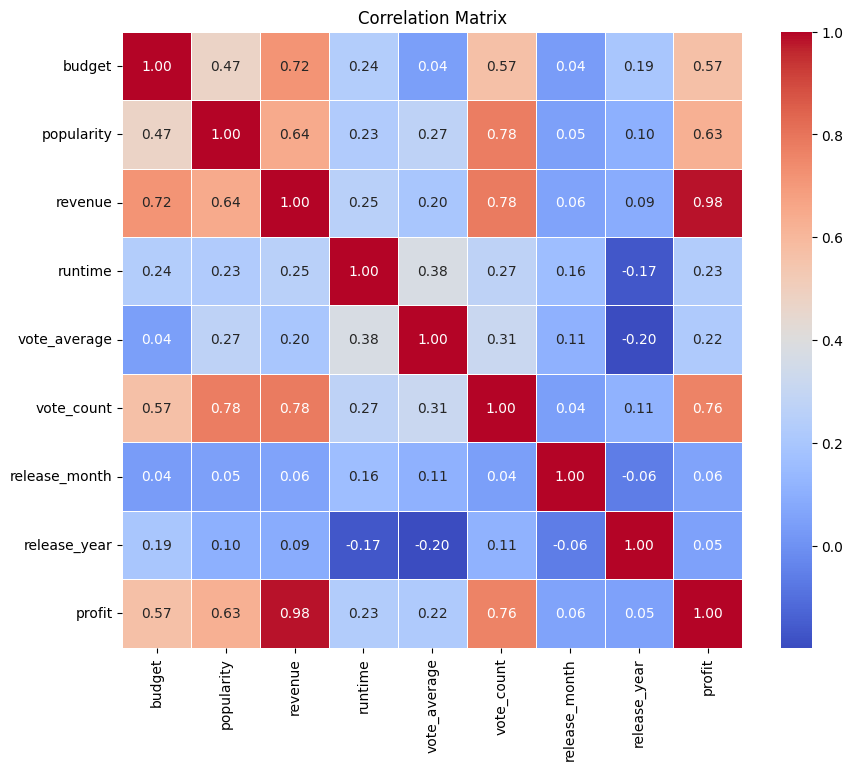

In [55]:
# Select only the numerical columns for correlation analysis
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64'])
numerical_columns.drop(columns=['id'], inplace=True)

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Each cell in the matrix represents the correlation coefficient between two features, ranging from -1 to 1. A correlation coefficient closer to 1 indicates a strong positive correlation, while a coefficient closer to -1 indicates a strong negative correlation. Here's the description of the correlation matrix:

- **Budget vs. Other Features:** The budget shows strong positive correlations with revenue (0.72) and vote count (0.57), indicating that higher-budget movies tend to generate more revenue and receive more votes. There's also a moderate positive correlation with popularity (0.47) and profit (0.57), suggesting that higher-budget movies are more likely to be popular and profitable.

- **Popularity vs. Other Features:** Popularity exhibits strong positive correlations with revenue (0.64) and vote count (0.78), indicating that more popular movies tend to generate higher revenue and receive more votes. There's also a moderate positive correlation with profit (0.63), suggesting that popular movies are more likely to be profitable.

- **Revenue vs. Other Features:** Revenue shows a very strong positive correlation with budget (0.72) and vote count (0.78), indicating that higher-budget movies tend to generate more revenue and receive more votes. It also has a very strong positive correlation with profit (0.98), implying that movies with higher revenue are highly likely to be profitable.

- **Runtime vs. Other Features:** Runtime exhibits weak correlations with other features, suggesting minimal association with budget, popularity, revenue, and profit.

- **Vote Average vs. Other Features:** Vote average has weak correlations with other features, indicating minimal association with budget, popularity, revenue, and profit.

- **Vote Count vs. Other Features:** Vote count displays strong positive correlations with popularity (0.78) and revenue (0.78), indicating that movies with more votes tend to be more popular and generate higher revenue. It also has a strong positive correlation with profit (0.76), suggesting that movies with more votes are more likely to be profitable.

- **Release Month and Year vs. Other Features:** Release month and year show weak correlations with other features, indicating minimal associations with budget, popularity, revenue, and profit.

- **Profit vs. Other Features:** Profit exhibits strong positive correlations with popularity (0.62), revenue (0.98), and vote count (0.76), suggesting that profitable movies tend to be more popular, generate higher revenue, and receive more votes. It also has a moderate positive correlation with budget (0.57), indicating that movies with higher budgets are more likely to be profitable.

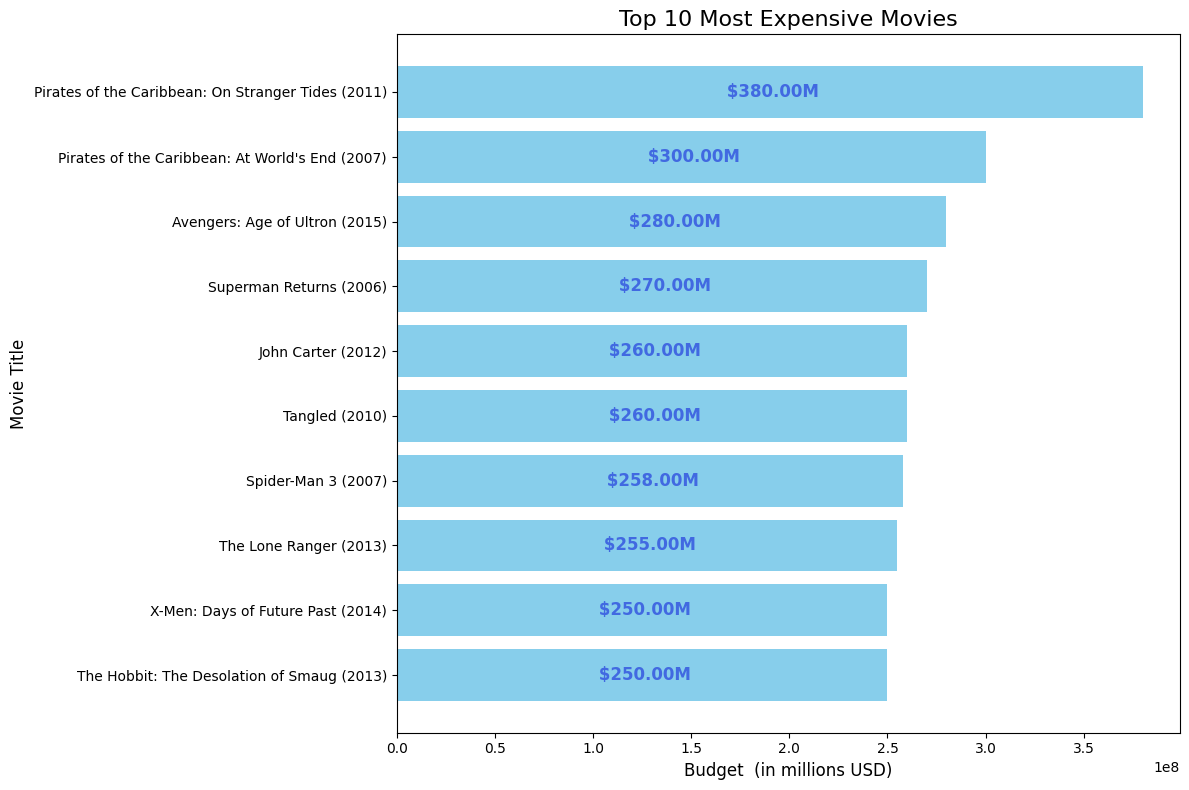

In [31]:
# Sort the DataFrame by 'budget' column in descending order
top_10_expensive = df.sort_values(by='budget', ascending=False).head(10)

# Create a bar plot for the top 10 most expensive movies
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_expensive['title'] + ' (' + top_10_expensive['release_year'].astype(int).astype(str) + ')',
                top_10_expensive['budget'], color='skyblue')

# Add data labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f' ${width/1e6:.2f}M',
             ha='center', va='center', fontsize=12, color='royalblue', weight='bold')

 
plt.xlabel('Budget  (in millions USD)', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top 10 Most Expensive Movies', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest budget at the top
plt.tight_layout()
plt.show()

It appears that the "Pirates of the Caribbean" series has the highest budget among the top 10 most expensive movies, followed by the "Avengers" series. This suggests that these blockbuster franchises invested substantial amounts of money in their production, possibly due to the extensive visual effects, star-studded casts, and elaborate sets required for such high-profile productions. 

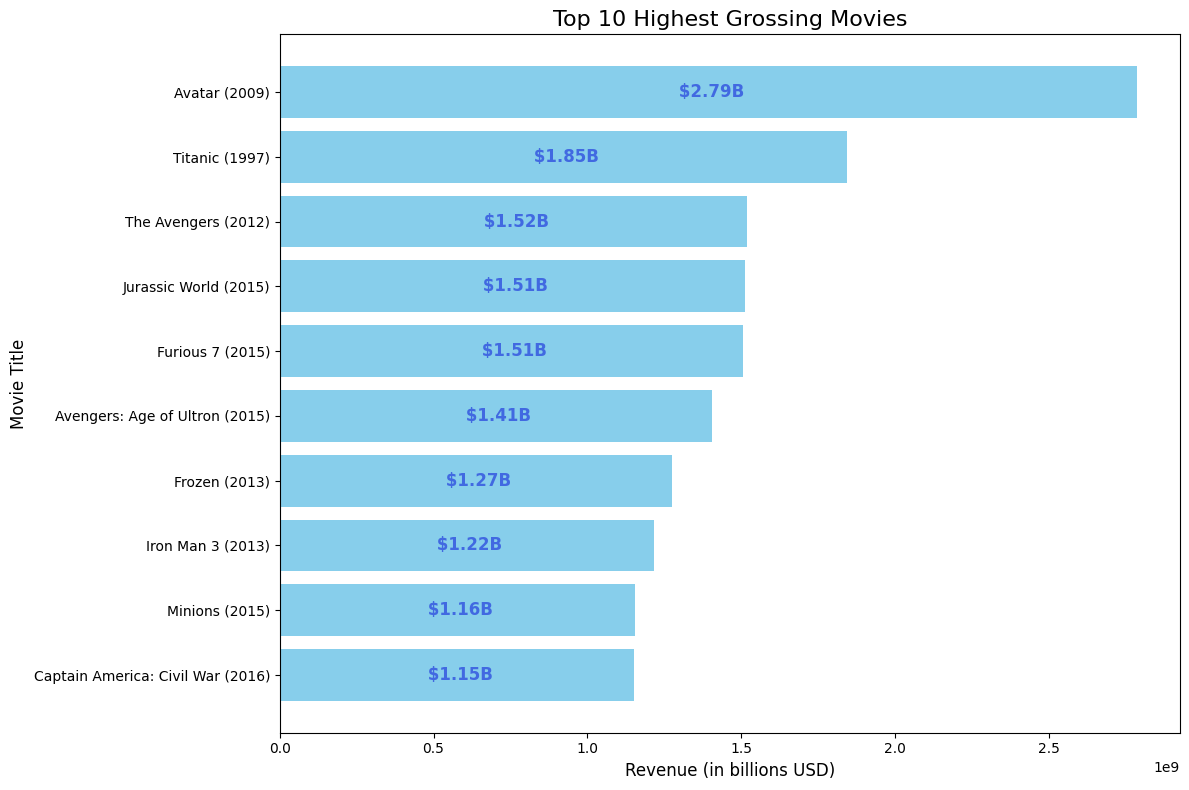

In [163]:
# Sort the DataFrame by 'revenue' column in descending order
top_10_grossing = df.sort_values(by='revenue', ascending=False).head(10)

# Create a bar plot for the top 10 highest grossing movies
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_grossing['title'] + ' (' + top_10_grossing['release_year'].astype(int).astype(str) + ')',
                top_10_grossing['revenue'], color='skyblue')

# Add data labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f' ${width/1e9:.2f}B',
             ha='center', va='center', fontsize=12, color='royalblue', weight='bold')

plt.xlabel('Revenue (in billions USD)', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top 10 Highest Grossing Movies', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The top 10 highest-grossing movies showcase some of the most iconic and commercially successful films in cinematic history. At the pinnacle sits "Avatar," directed by James Cameron, with a staggering revenue of over 2.7 billion USD, making it the highest-grossing movie of all time. Following behind is another Cameron masterpiece, "Titanic," which garnered approximately 1.85 billion USD in revenue. As we descend the list, we observe that the revenue margins narrow, with movies such as "Furious 7," "Jurassic World," and "The Avengers" accumulating comparable revenue figures. 

In [180]:
# Extract relevant information about these movies
top_grossing_genres = top_10_grossing['genres'].explode()

# Analyze the extracted information to find commonalities or patterns
# Find the most common genre among these movies
most_common_genre = top_grossing_genres.value_counts().head(3)
print("Three of the most common genres among the top grossing movies are:")
for genre, count in most_common_genre.items():
    print("- {}: {} movies of 10".format(genre, count))

Three of the most common genres among the top grossing movies are:
- Adventure: 8 movies of 10
- Action: 7 movies of 10
- Science Fiction: 6 movies of 10


The genres of the top grossing movies were analyzed to identify commonalities. The most common genres among the top grossing movies were determined and presented. From the analysis, it's evident that adventure, action, and science fiction are the most common genres among the top grossing movies, with adventure being the most prevalent, followed by action and science fiction. This suggests that movies with elements of adventure, action, and fantasy tend to attract larger audiences and generate higher revenues, possibly due to their widespread appeal and ability to offer immersive cinematic experiences.

In [ ]:
# Print the directors for each of top grossing movies
for index, row in top_10_grossing.iterrows():
    # Extract director information for the current movie
    top_grossing_directors = [crew_member['name'] for crew_member in
                              row['crew'] if crew_member['department'] == 'Directing']
    
    # Print movie title and directors
    print("Movie:", row['title'])
    print("Directors:", ", ".join(top_grossing_directors))
    print()


Movie: Avatar
Directors: James Cameron

Movie: Titanic
Directors: James Cameron

Movie: The Avengers
Directors: Joss Whedon, Trudy Ramirez

Movie: Jurassic World
Directors: Colin Trevorrow, Chris Castaldi, Scott Koche, Joyce McCarthy, Nathan Parker, Stockton David Porter, Zack Smith, Spencer Taylor

Movie: Furious 7
Directors: James Wan, Jody Blose, Brenda K. Wachel

Movie: Avengers: Age of Ultron
Directors: Joss Whedon

Movie: Frozen
Directors: Chris Buck, Jennifer Lee, Rick Moore, Merrick Rustia, Matsune Suzuki, Kendra Vander Vliet, Scott Armstrong

Movie: Iron Man 3
Directors: Shane Black

Movie: Minions
Directors: Kyle Balda, Pierre Coffin

Movie: Captain America: Civil War
Directors: Anthony Russo, Joe Russo, Joe Russo



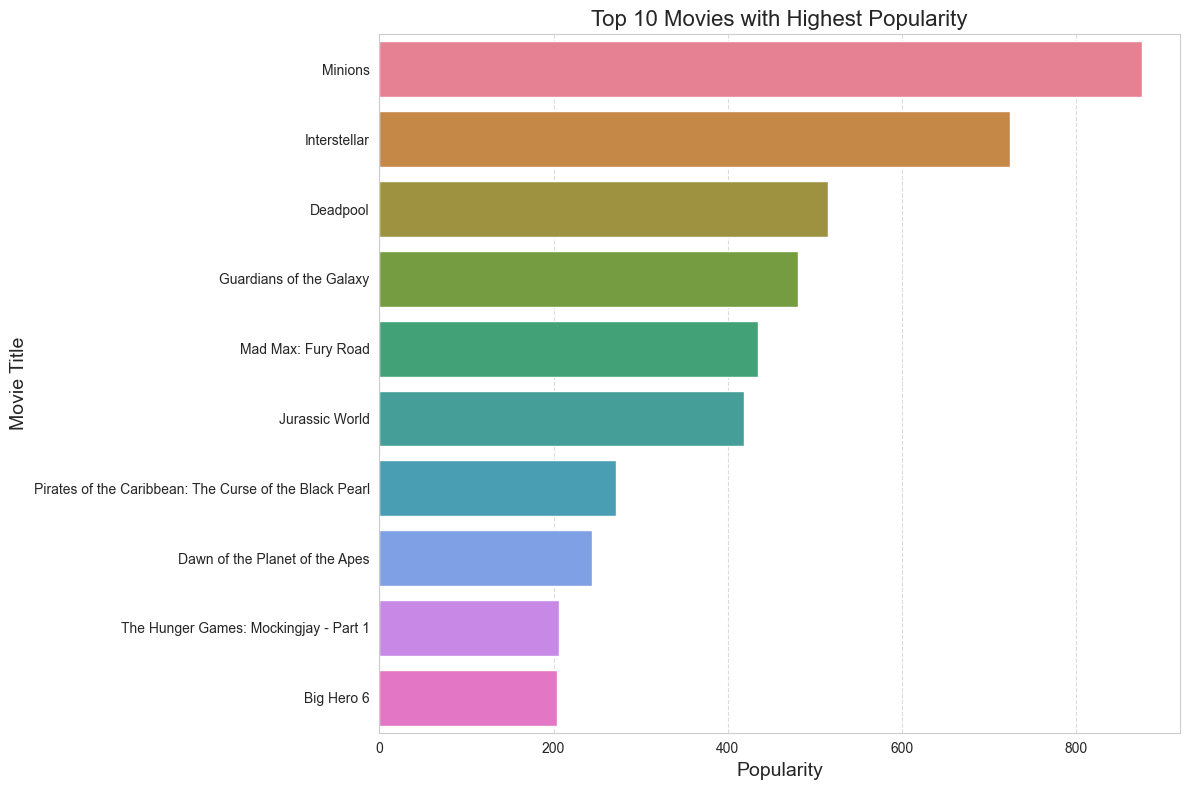

In [184]:
# Sort the DataFrame by 'popularity' column in descending order
top_10_popular = df.sort_values(by='popularity', ascending=False).head(10)

# Set style
sns.set_style("whitegrid")

# Create color palette
colors = sns.color_palette("husl", 10)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='title', data=top_10_popular, palette=colors)

# Add labels and title
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.title('Top 10 Movies with Highest Popularity', fontsize=16)

# Adjust layout
plt.tight_layout()

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

These movies have garnered significant attention and engagement from audiences, leading to high popularity scores on TMDB. It's worth noting that popularity scores are influenced by various factors such as the number of votes, views, user favorites, and watchlist additions. Therefore, movies with compelling narratives, impressive visual effects, memorable characters, and engaging marketing campaigns tend to rank higher in popularity. In this list, animated films like "Minions" and "Big Hero 6" are particularly prominent, suggesting a strong appeal to audiences across different age groups. Similarly, blockbuster franchises such as "Guardians of the Galaxy," "Jurassic World," and "Pirates of the Caribbean" also rank highly.

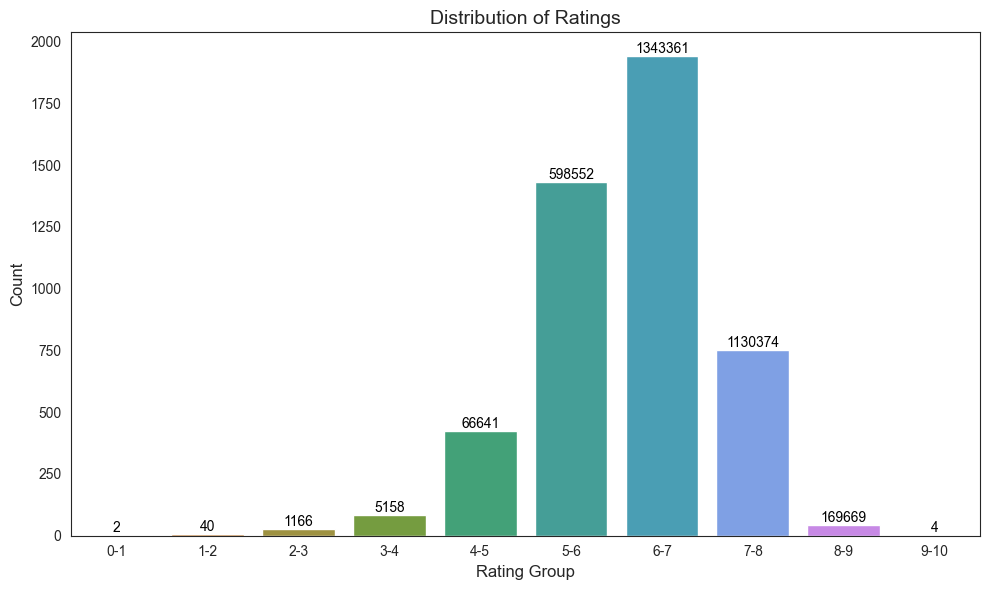

In [231]:
# Define the bins
bins = [x for x in range(11)]

# Group the ratings into bins
df['rating_group'] = pd.cut(df['vote_average'], bins=bins, labels=[f'{i}-{i+1}' for i in range(10)])

# Group by rating group and sum the vote counts
rating_group_counts = df.groupby('rating_group')['vote_count'].sum().reset_index()

# Create the count plot
plt.figure(figsize=(10, 6))
bars = sns.countplot(data=df, x='rating_group', palette='husl')
plt.title('Distribution of Ratings', fontsize=14)
plt.xlabel('Rating Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# Add custom labels on top of the bars
for bar, label in zip(bars.patches, rating_group_counts['vote_count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, label,
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

The rating distribution plot provides insight into the distribution of movie ratings within the dataset. The bars in the plot represent the count of movies with that rating group rather than the number of people who voted within each rating group. However, the labels on each bar indicate the number of people who voted. This means that each bar represents the number of movies falling within a specific rating range, and the label on each bar denotes the total number of votes received by all movies within that range. This distinction is important as it provides insight into both the distribution of movies across different rating ranges and the level of engagement or popularity indicated by the number of votes.

Upon analysis, it's evident that the majority of movies fall within the rating range of 6 to 7, followed by the range of 5 to 6, and then 7 to 8. This suggests that a significant portion of the movies in the dataset are rated moderately, with fewer extremes at the lower and higher ends of the rating spectrum. Interestingly, the distribution follows a roughly normal distribution, albeit slightly skewed to the right.

It's worth mentioning that some of the average ratings in the original dataset are averaged from only a few ratings. This poses a potential issue as movies with a small number of ratings may have their averages skewed, impacting any analyses related to ratings. For instance, the group representing ratings of 9-10 contains three movies, but the total number of people who voted is only four. This scenario illustrates how a small number of high ratings can significantly influence the average rating of a movie, potentially misleading interpretations of its overall quality. Hence, filtering out movies with only a few ratings would be advisable to ensure more accurate analyses.

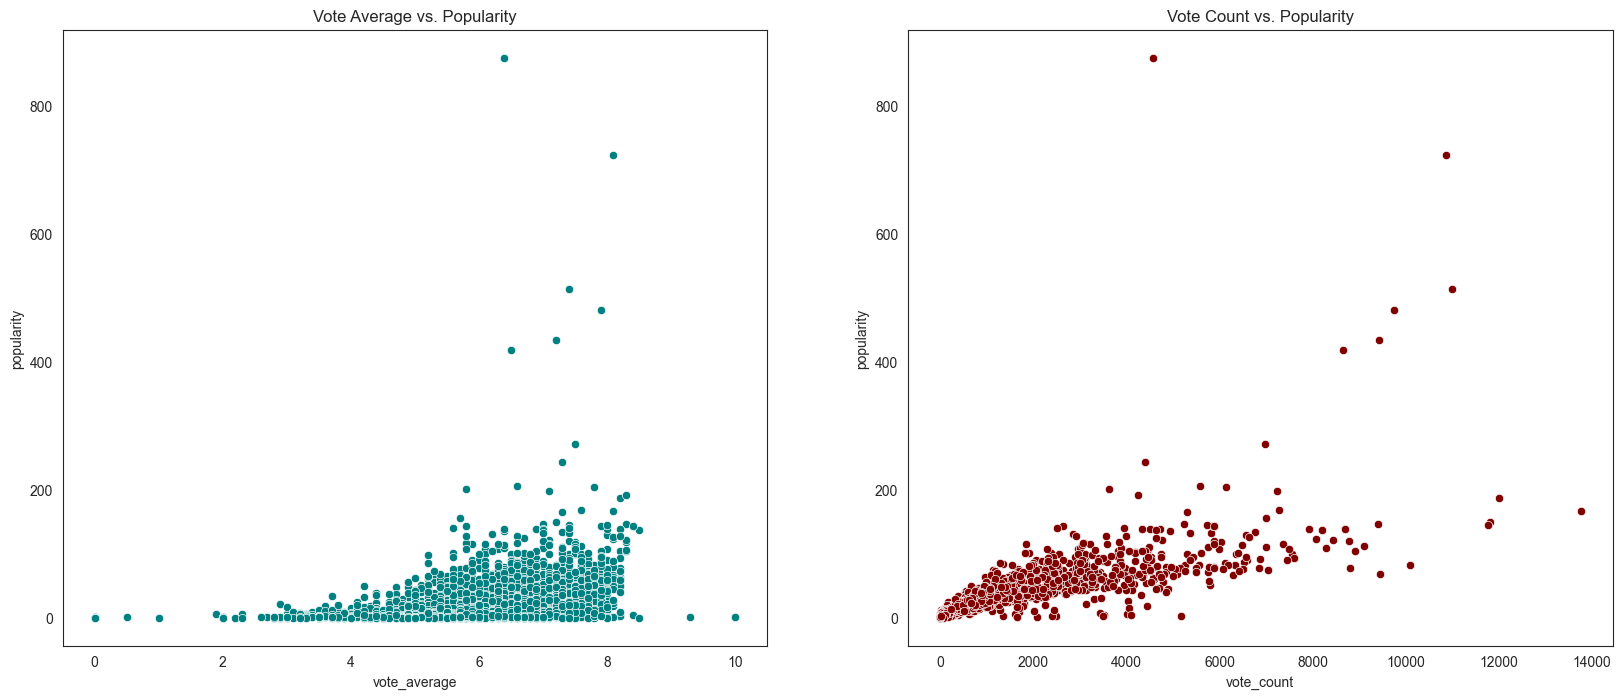

In [207]:
# Scatter Plot of Popularity vs Vote Average/Vote Count
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.scatterplot(data=df, x=df['vote_average'], y=df['popularity'], ax=ax[0], color='teal')
sns.scatterplot(data=df, x=df['vote_count'], y=df['popularity'], ax=ax[1], color='maroon')

ax[0].set_title('Vote Average vs. Popularity', fontsize=12)
ax[1].set_title('Vote Count vs. Popularity', fontsize=12)

plt.show()

The scatter plots show how different factors like popularity, vote count, and vote average relate to each other.

In the comparison between popularity and vote average, it's observed that the majority of movies with high popularity scores have an average vote score below 200. This indicates that a high popularity score does not necessarily correlate with a high average vote score. This disparity suggests that factors other than vote average contribute to a movie's popularity, such as the number of views, user engagement, and favoriting.

Additionally, examining the relationship between vote count and popularity reveals that the majority of vote counts are concentrated around the 0-4000 mark. However, as the vote count increases, there appears to be a slight uptick in popularity, implying a positive correlation between the two variables. This observation suggests that movies with higher vote counts tend to be more popular, although other factors may also influence popularity.

In both plots, there are some outliers—data points that don't fit the overall trend. These outliers represent movies with exceptional values for one or more factors, which could be interesting to explore further.

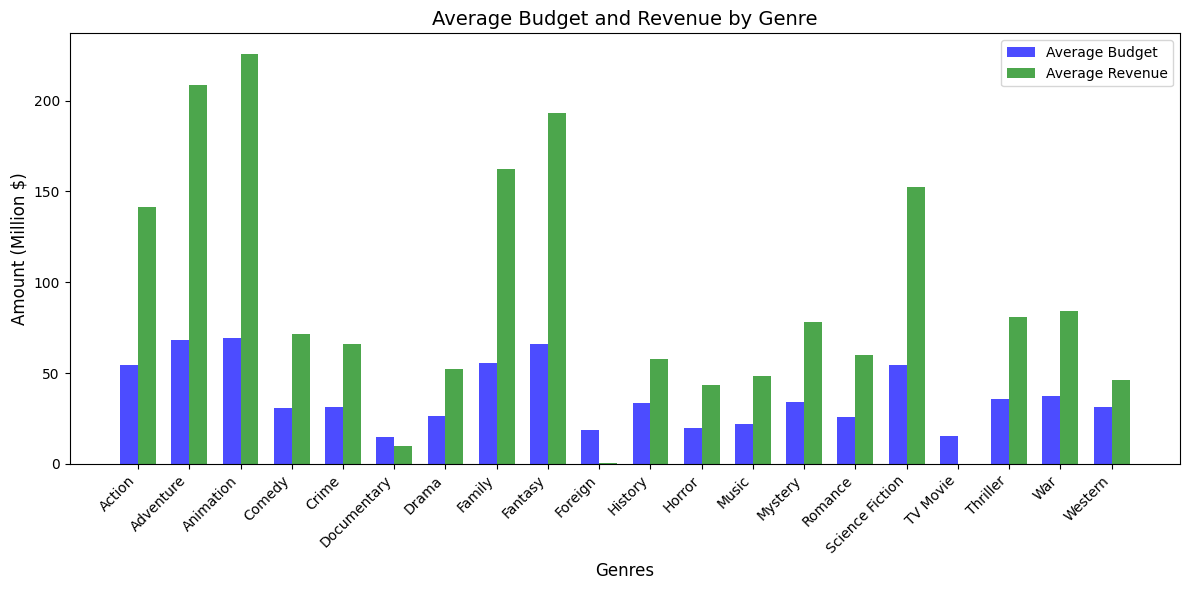

In [57]:
# Explode the 'genres' column
exploded_df = df.explode('genres')

# Group by genre and calculate average budget and revenue
genre_stats = exploded_df.groupby('genres').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Plot the average budget and revenue for each genre
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(genre_stats))

plt.bar(index, genre_stats['budget']/1e6, bar_width, color='blue', alpha=0.7, label='Average Budget')
plt.bar([i + bar_width for i in index], genre_stats['revenue']/1e6, bar_width,
        color='green', alpha=0.7, label='Average Revenue')

plt.xlabel('Genres', fontsize=12)
plt.ylabel('Amount (Million $)', fontsize=12)
plt.title('Average Budget and Revenue by Genre', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], genre_stats['genres'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Among the genres, Adventure movies appear to have the highest average budget and revenue, followed closely by Science Fiction and Fantasy. This suggests that these genres tend to have higher production budgets and generate substantial revenue compared to others.

On the other hand, genres like Documentary, Foreign, and TV Movie have significantly lower average budgets and, in some cases, negligible revenue. This could be attributed to their limited representation in dataset.

Word clouds for textual data like keywords and genres can visualize the most common words or phrases used in movie descriptions.

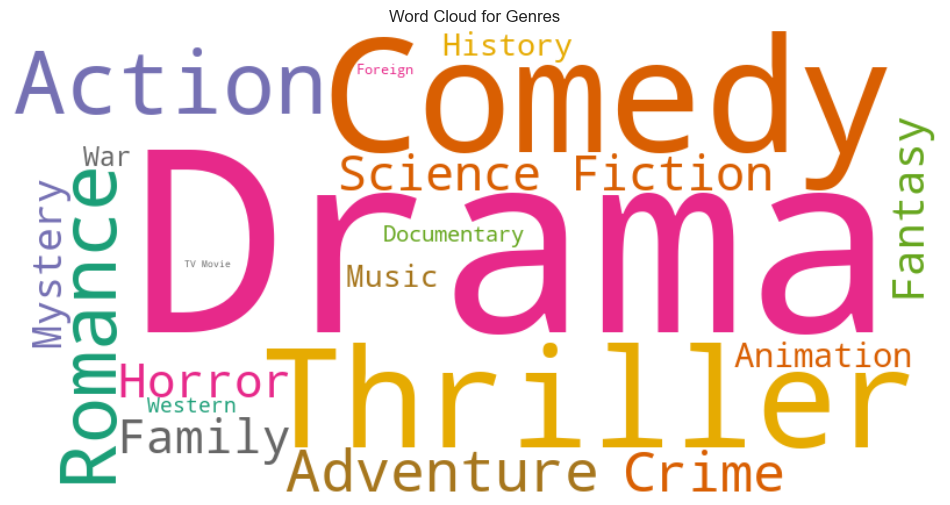

In [244]:
# Flatten the list of genres and count the occurrences of each genre
genre_counts = df['genres'].explode().dropna().value_counts()

# Generate word cloud
genre_wordcloud = WordCloud(width=800, height=400,
                            background_color='white', colormap='Dark2'
                            ).generate_from_frequencies(genre_counts)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genres')
plt.show()


The word cloud showcases the frequency of different genres present in the dataset. The most prevalent genres include Drama, Comedy, Thriller, and Action, indicating that these genres are highly represented among the movies in the dataset. Conversely, genres such as TV Movie and Foreign are less represented, with fewer instances in the dataset.

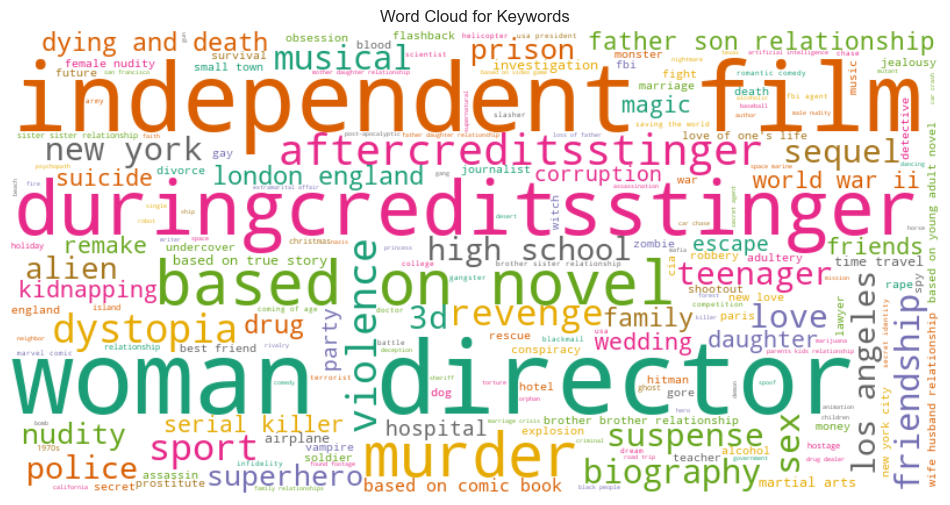

In [246]:
# Flatten the list of keywords and count the occurrences of each one
keyword_counts = df['keywords'].explode().dropna().value_counts()

# Generate word cloud
keyword_wordcloud = WordCloud(width=800, height=400,
                              background_color='white', colormap='Dark2'
                              ).generate_from_frequencies(keyword_counts)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(keyword_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Keywords')
plt.show()


The word cloud above visualizes the frequency of keywords extracted from the dataset. Some of the most prominent keywords include "woman director", "independent film", "duringcreditsstinger", "based on novel", and "murder", among others. These keywords provide insights into common themes, genres, or elements present in the movies within the dataset.

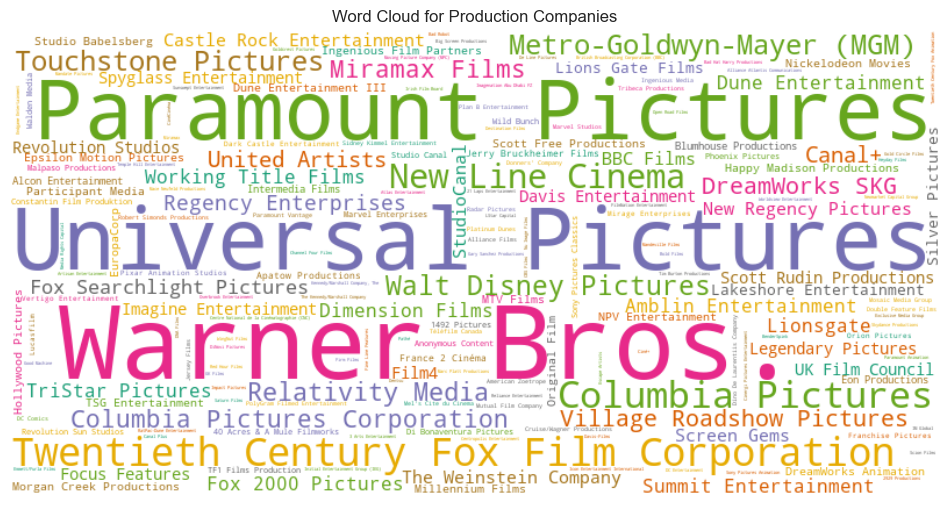

In [248]:
# Flatten the list and count the occurrences of each one
prod_company_counts = df['production_companies'].explode().dropna().value_counts()

# Generate word cloud
prod_company_wordcloud = WordCloud(width=800, height=400,
                              background_color='white', colormap='Dark2'
                              ).generate_from_frequencies(prod_company_counts)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(prod_company_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Production Companies')
plt.show()


The word cloud above illustrates the frequency of production companies extracted from the dataset. Some of the most prevalent production companies include "Warner Bros.", "Universal Pictures", "Paramount Pictures", "Twentieth Century Fox Film Corporation", and "Columbia Pictures", among others. These production companies are likely to have significant contributions to the movies within the dataset.

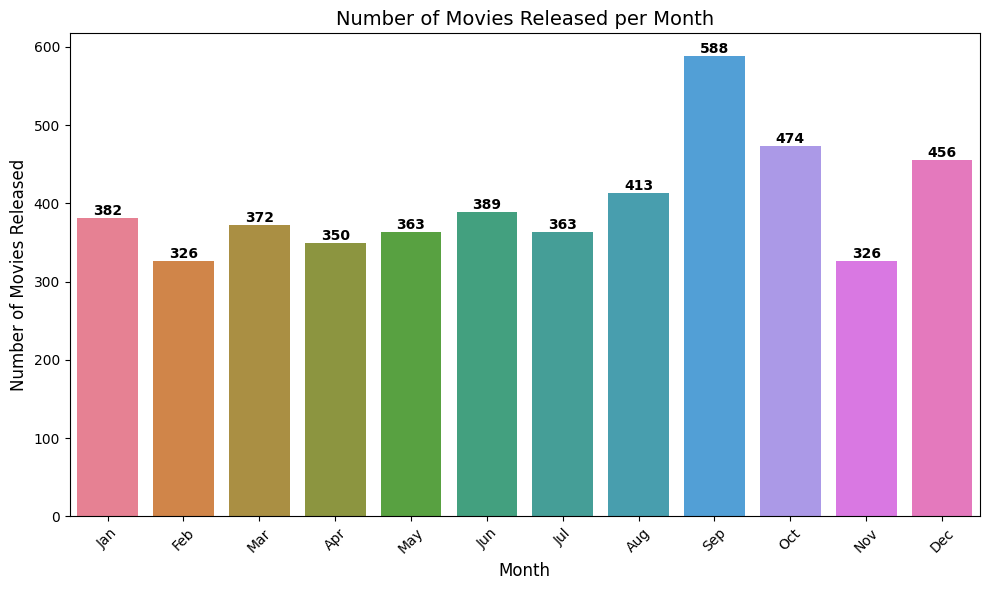

In [59]:
# Count the number of movies released per month
movies_per_month = df['release_month'].value_counts().sort_index()

# Convert month numbers to month names
month_names = [calendar.month_abbr[month] for month in movies_per_month.index.astype(int)]

# Create color palette
colors = sns.color_palette("husl", 12)

# Plot the number of movies released per month
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=month_names, y=movies_per_month, palette=colors)
plt.title('Number of Movies Released per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.xticks(rotation=45)
# Add labels on the bars
for index, value in enumerate(movies_per_month):
    barplot.text(index, value, str(value),ha='center', va='bottom', weight='bold')
plt.tight_layout()
plt.show()


The distribution of movies released per month provides insights into the seasonal trends and patterns in movie releases. Surprisingly, the month of September has seen the maximum number of movie releases, followed closely by October and December. This contradicts the popular belief that August and September are dump months in the Hollywood film industry, characterized by lower movie attendance due to the beginning of the school year and other factors. However, the dataset reveals a different scenario, with September and October emerging as peak months for movie releases.

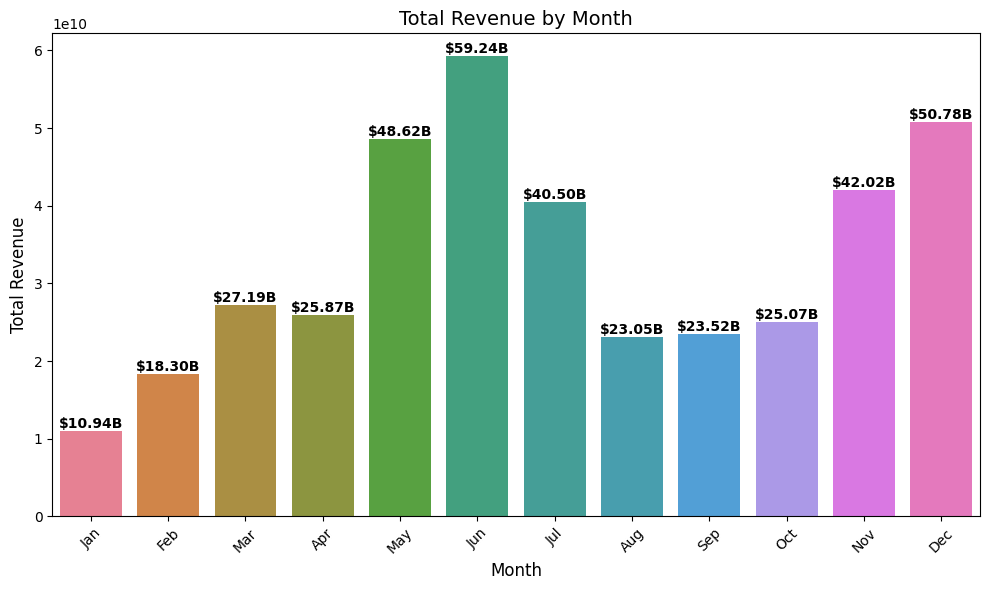

In [60]:
# Group the data by month and calculate the total revenue
revenue_per_month = df.groupby('release_month')['revenue'].sum()

# Plot the total revenue by month
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=month_names, y=revenue_per_month, palette=colors)
plt.title('Total Revenue by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
# Add labels on the bars
for index, value in enumerate(revenue_per_month):
    barplot.text(index, value, f'${value / 1e9:.2f}B', ha='center', va='bottom', weight='bold')
plt.tight_layout()
plt.show()

Key Insights: The analysis provides insights into revenue trends over time based on the total revenue generated by movies released each month.

High Revenue Months: June, May, December, and November emerge as the months with the highest total revenue, indicating potentially lucrative periods for movie releases.

Moderate Revenue Months: Months like March, April, July, and August also contribute significantly to the total revenue, albeit to a lesser extent compared to the peak months.

Low Revenue Months: January and February exhibit comparatively lower total revenue, possibly due to post-holiday season slowdown and fewer major releases during these months.

Holiday Season Impact: December traditionally sees high revenue due to the holiday season, which attracts more moviegoers.

Geographic Considerations: The dataset's composition, with a significant portion likely from the United States, may influence the observed revenue trends, particularly those aligned with the U.S. summer vacation period from May to August.

Variations Across Countries: It's important to consider that holiday seasons and peak moviegoing periods may vary across countries, potentially impacting revenue trends differently in different regions.

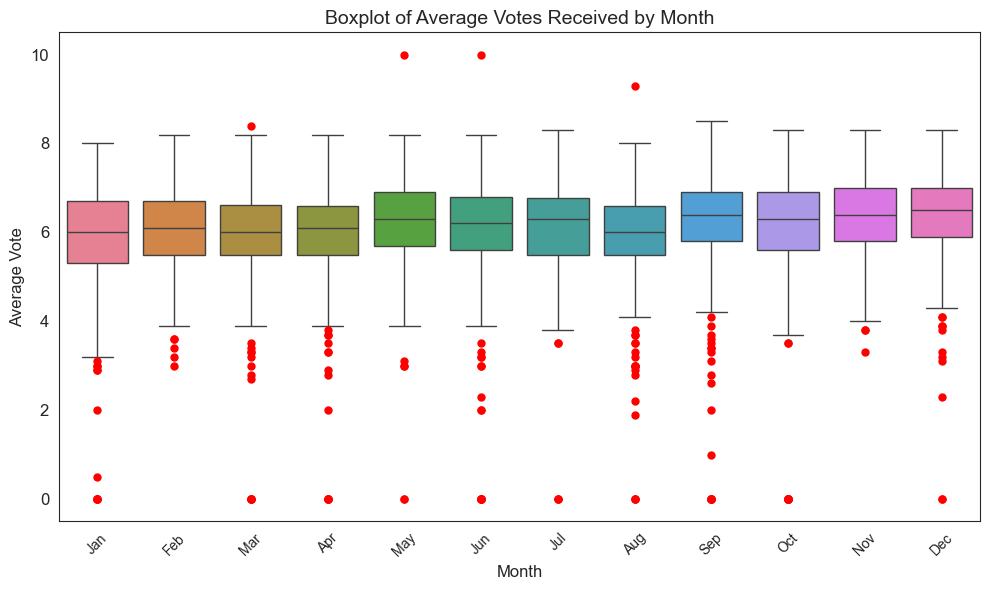

In [269]:
# Create a boxplot of average votes received by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_month', y='vote_average', data=df, palette=colors,
            flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'))
plt.title('Boxplot of Average Votes Received by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Vote', fontsize=12)
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


The median for the month of December is the highest among all months, suggesting that movies released in December tend to receive higher average votes compared to other months.

The spread of votes is more pronounced in the lower range for the month of September, indicating variability in the quality of content released during that month.

An anomaly exists where movies in all months have received a rating of 0.0, which may be attributed to a data entry error. These instances should be removed to ensure accurate analysis.

Upon further examination, the median vote count across all months falls within the range of 6, indicating moderate voting activity.
Notably, movies released in January, May, June, July, and August have at least one instance of receiving a rating of 10.0. However, January also exhibits movies with significantly lower ratings, such as 0.5.

In [ ]:
# Filter out movies with vote_average equal to 0
df_filtered = df[df['vote_average'] != 0]

# Calculate median, minimum, and maximum vote averages per month
vote_stats = df_filtered.groupby('release_month')['vote_average'].agg(['median', 'min', 'max']).reset_index()

# Sort the DataFrame by month
vote_stats = vote_stats.sort_values(by='release_month')

# Display the formatted statistics
print(vote_stats)


    release_month  median  min   max
0             1.0     6.0  0.5  10.0
1             2.0     6.1  3.0   8.3
2             3.0     6.0  2.7   8.4
3             4.0     6.1  2.0   8.2
4             5.0     6.3  3.0  10.0
5             6.0     6.3  2.0  10.0
6             7.0     6.3  3.5  10.0
7             8.0     6.0  1.9   9.3
8             9.0     6.4  1.0   8.5
9            10.0     6.3  3.5   8.3
10           11.0     6.4  1.0   8.3
11           12.0     6.5  2.3   8.3


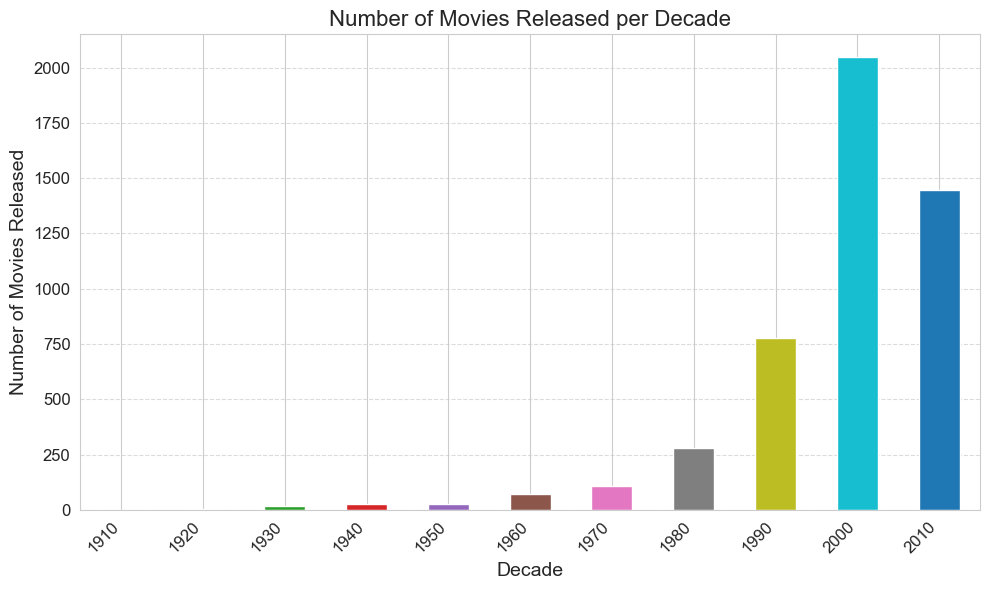

In [ ]:
# Group the movies by decade
df['decade'] = ((df['release_year'] // 10) * 10).astype(int)

# Group the movies by decade and count the number of movies in each decade
movies_per_decade = df['decade'].value_counts().sort_index()

# Define colors for the bars
colors = plt.cm.tab10.colors

# Plot the number of movies per decade
plt.figure(figsize=(10, 6))
movies_per_decade.plot(kind='bar', color=colors)
plt.title('Number of Movies Released per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The first year recorded in the dataset is 1916 and the last recorded year is 2017. This means there is 101 years of movie data stored in the database, which may make doing analysis by year of release tricky since the timeframe is so large. 

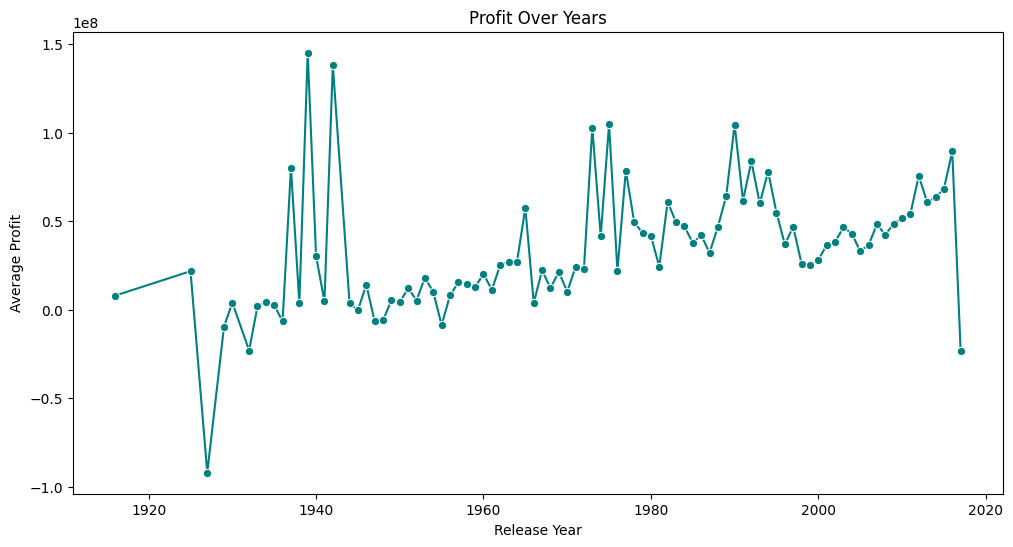

In [61]:
# Time Series Plot of Profit Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='profit', data=df.groupby('release_year')['profit'].mean().reset_index(),
             marker='o', color='teal')
plt.title('Profit Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Profit')
plt.savefig('profit_year.png', dpi=300)
plt.show()

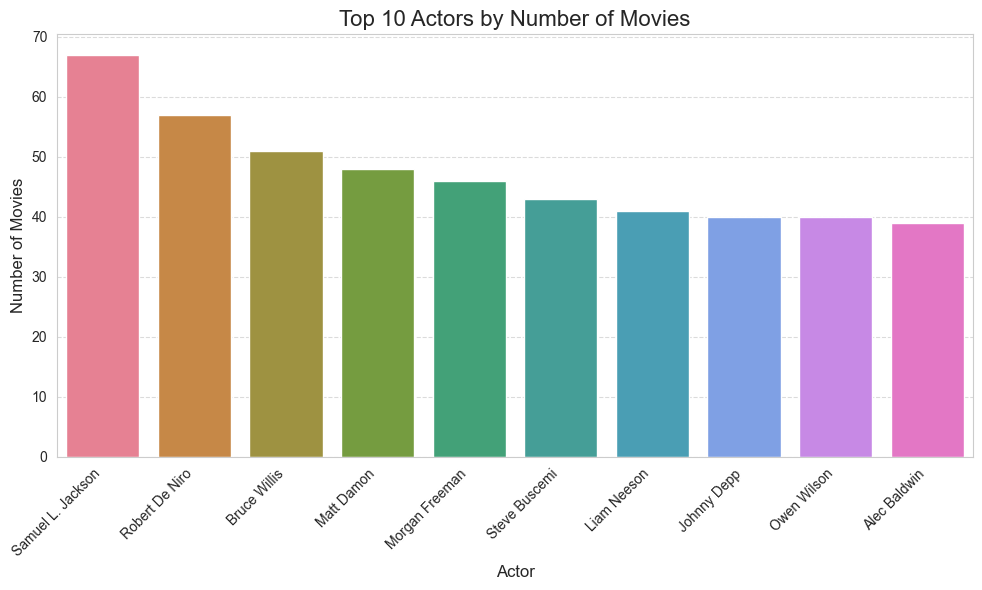

In [ ]:
# Apply a lambda function to each row in the 'cast' column to extract actors
actors = df['cast'].apply(lambda cast_list: [actor['name'] for actor in cast_list])

# Flatten the list of actors
actors_flat = [actor for sublist in actors for actor in sublist]

# Count occurrences of each actor
top_10_actors = pd.Series(actors_flat).value_counts().head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_actors.index, y=top_10_actors.values, palette='husl')
plt.title('Top 10 Actors by Number of Movies', fontsize=16)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

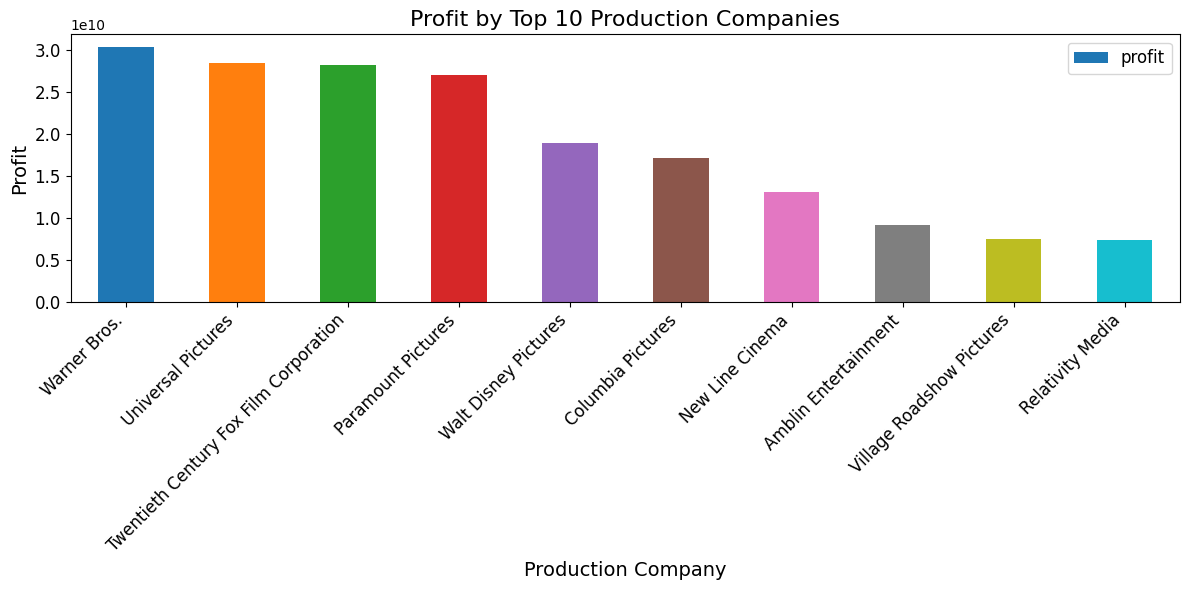

In [66]:
# Extract top 10 production companies
top_production_companies = df['production_companies'].explode().value_counts().nlargest(10).index

# Filter the DataFrame to include only movies from the top production companies
df_top_production = df[df['production_companies'].apply(lambda x: any(company in top_production_companies for company in x))]

# Calculate profit for each production company
production_profit = df_top_production.explode('production_companies').groupby('production_companies')['profit'].sum().sort_values(ascending=False)

# Filter to include only the top 10 production companies
production_profit = production_profit.head(10)

# Define custom colors for the plot
colors = plt.cm.tab10.colors

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
production_profit.plot(kind='bar', stacked=True, color=colors)
plt.title('Profit by Top 10 Production Companies', fontsize=16)
plt.xlabel('Production Company', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


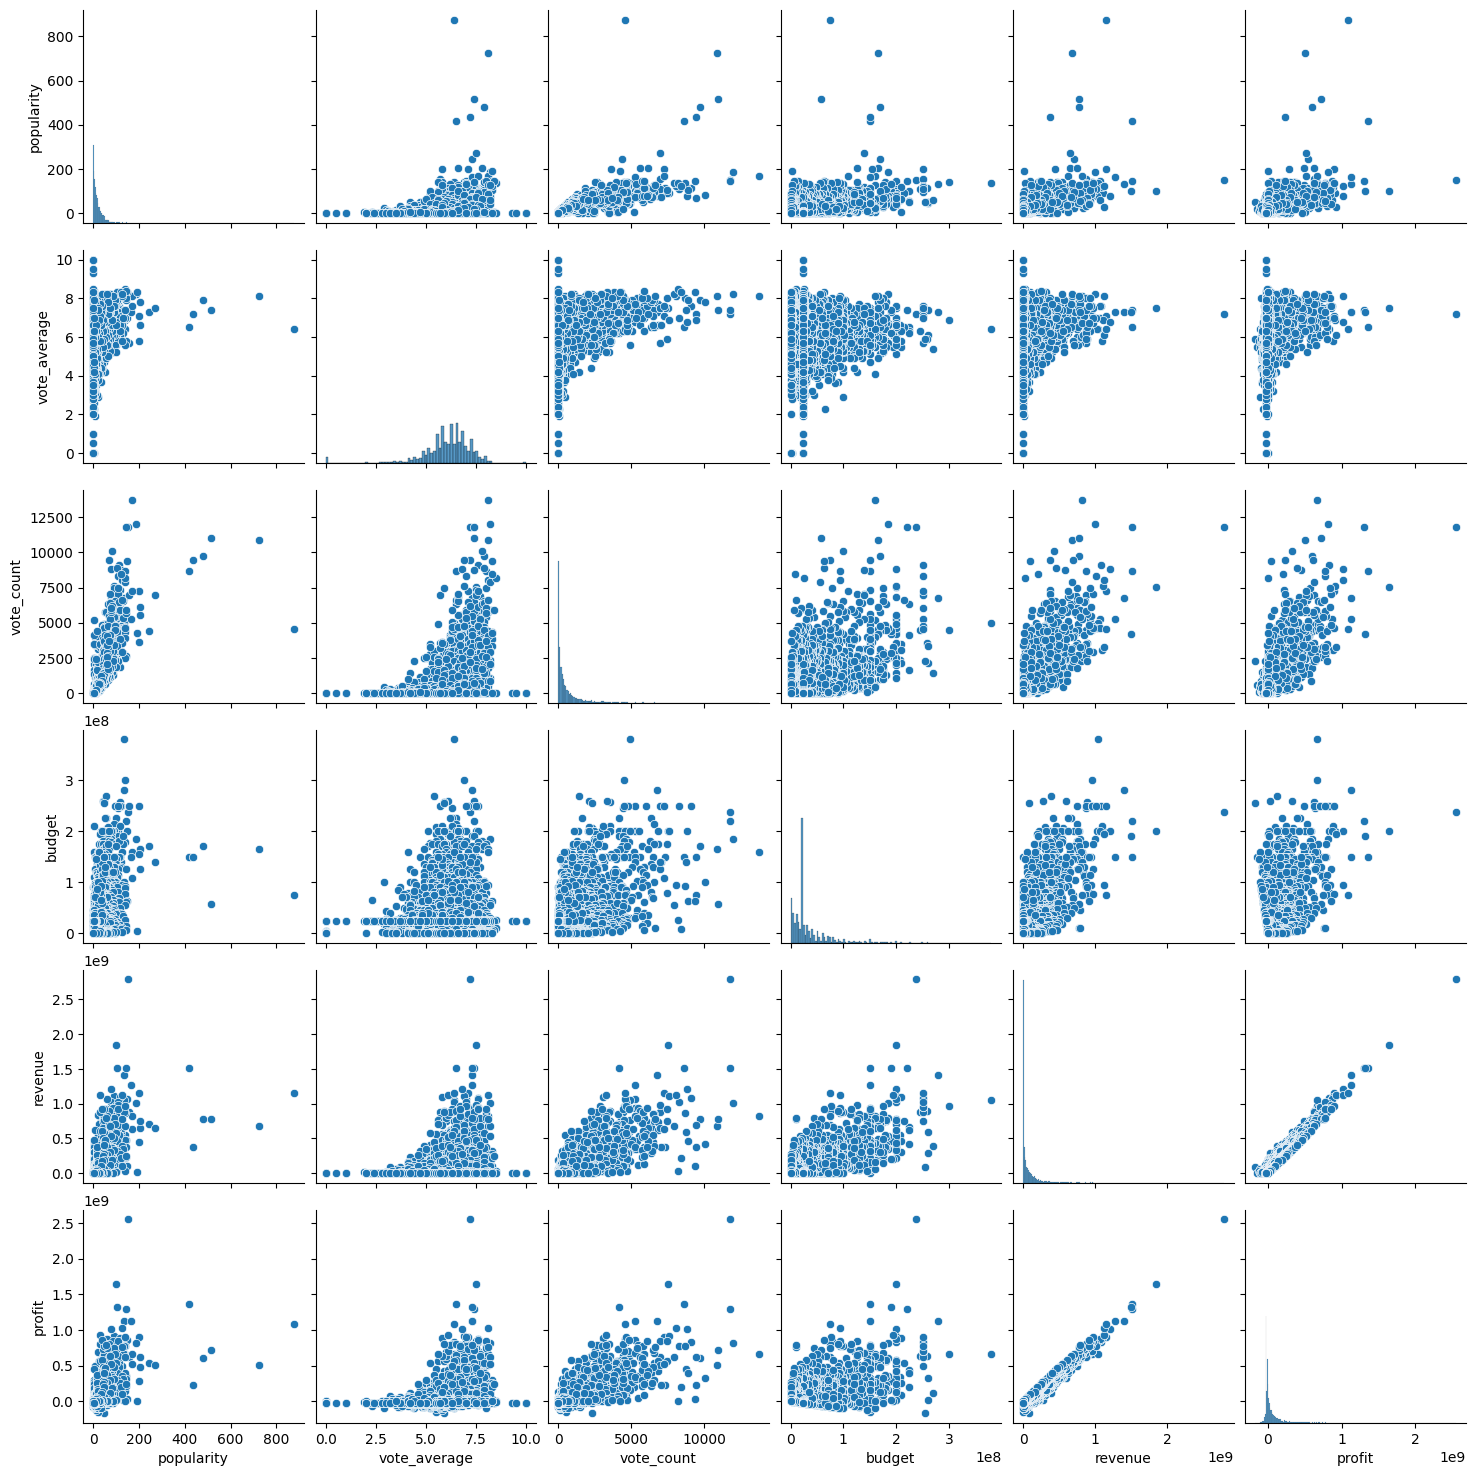

In [101]:
relevant_columns = ['popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'profit']

# Create a pairplot
sns.pairplot(df[relevant_columns])
plt.show()


# <a id='toc7_'></a>[Data Modeling](#toc0_)

In [38]:
# Concatenate encoded features with the selected features to create X dataframe
selected_features = df[['popularity', 'vote_average', 'budget', 'genres_id_0', 'keywords_id_0', 'runtime',
                        'cast_id_0', 'director_id_0', 'production_companies_id_0', 'release_month', 'release_year', 'profit'
                        # 'original_language', 'production_countries'
                        ]]

In [39]:
# Drop rows with missing values
print(selected_features.shape)
selected_features.dropna(inplace=True)
print(selected_features.shape)

(4802, 12)
(4182, 12)


In [40]:
# Create X without the 'profit' column
X = selected_features.drop(columns=['profit'])

# Create y with only the 'profit' column
y = (selected_features['profit'] > 0).astype(int)


In [32]:
# # Convert the list of genres into separate binary columns
# mlb = MultiLabelBinarizer()
# genres_encoded = pd.DataFrame(mlb.fit_transform(X['genres']), columns=mlb.classes_, index=X.index)

# # Concatenate the encoded genres DataFrame with the original DataFrame
# X_encoded = pd.concat([selected_features.drop('genres', axis=1), genres_encoded], axis=1)

In [41]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3345, 11)
Shape of X_test: (837, 11)
Shape of y_train: (3345,)
Shape of y_test: (837,)


## <a id='toc7_1_'></a>[Models](#toc0_)

A set of classification models is defined, including Logistic Regression, Decision Tree, Random Forest, and XGBoost.

In [43]:
# Model Selection
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

Each model in the set is trained using the training data (X_train, y_train) to learn the underlying patterns in the data.
After training, the trained models make predictions on the testing data (X_test).

Evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score are computed for each model using functions from the sklearn.metrics module.
These evaluation metrics provide insights into the performance of each model in terms of its ability to correctly classify instances from the testing data.

The evaluation results for each model, including the calculated metrics, are stored in a dictionary (results).
This dictionary serves as a summary of the performance of each model, allowing for easy comparison and selection of the best-performing model for the given classification task.

In [44]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # Make predictions on the testing data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }


## <a id='toc7_2_'></a>[Evaluation](#toc0_)

Each model was trained using the training data and evaluated using the testing data. The performance of each model was assessed using the following metrics:

**Accuracy:** The proportion of correctly predicted outcomes over the total number of predictions.<br>
**Precision:** The proportion of true positive predictions over the total number of positive predictions.<br>
**Recall:** The proportion of true positive predictions over the total number of actual positive outcomes.<br>
**F1-Score:** The harmonic mean of precision and recall, providing a balanced measure of model performance.<br>
**ROC-AUC:** The area under the Receiver Operating Characteristic (ROC) curve, which measures the model's ability to distinguish between positive and negative classes.

In [51]:
# Model Evaluation
pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.788530,0.817073,0.822086,0.819572,0.781733
Decision Tree,0.744325,0.782341,0.779141,0.780738,0.737272
Random Forest,0.808841,0.816956,0.867076,0.841270,0.797044
XGBoost,0.799283,0.805714,0.865031,0.834320,0.785964


This code segment generates and displays confusion matrices for each model. A confusion matrix summarizes the model's performance by showing the counts of true positive, false positive, true negative, and false negative predictions. Each subplot represents a different model, with the title indicating the corresponding model. The color intensity in the cells reflects prediction counts, with darker shades indicating higher counts.

**TP (True Positive):** The model correctly predicts a movie as profitable.<br>
**FP (False Positive):** The model incorrectly predicts a movie as profitable when it is not.<br>
**FN (False Negative):** The model incorrectly predicts a movie as not profitable when it is.<br>
**TN (True Negative):** The model correctly predicts a movie as not profitable.

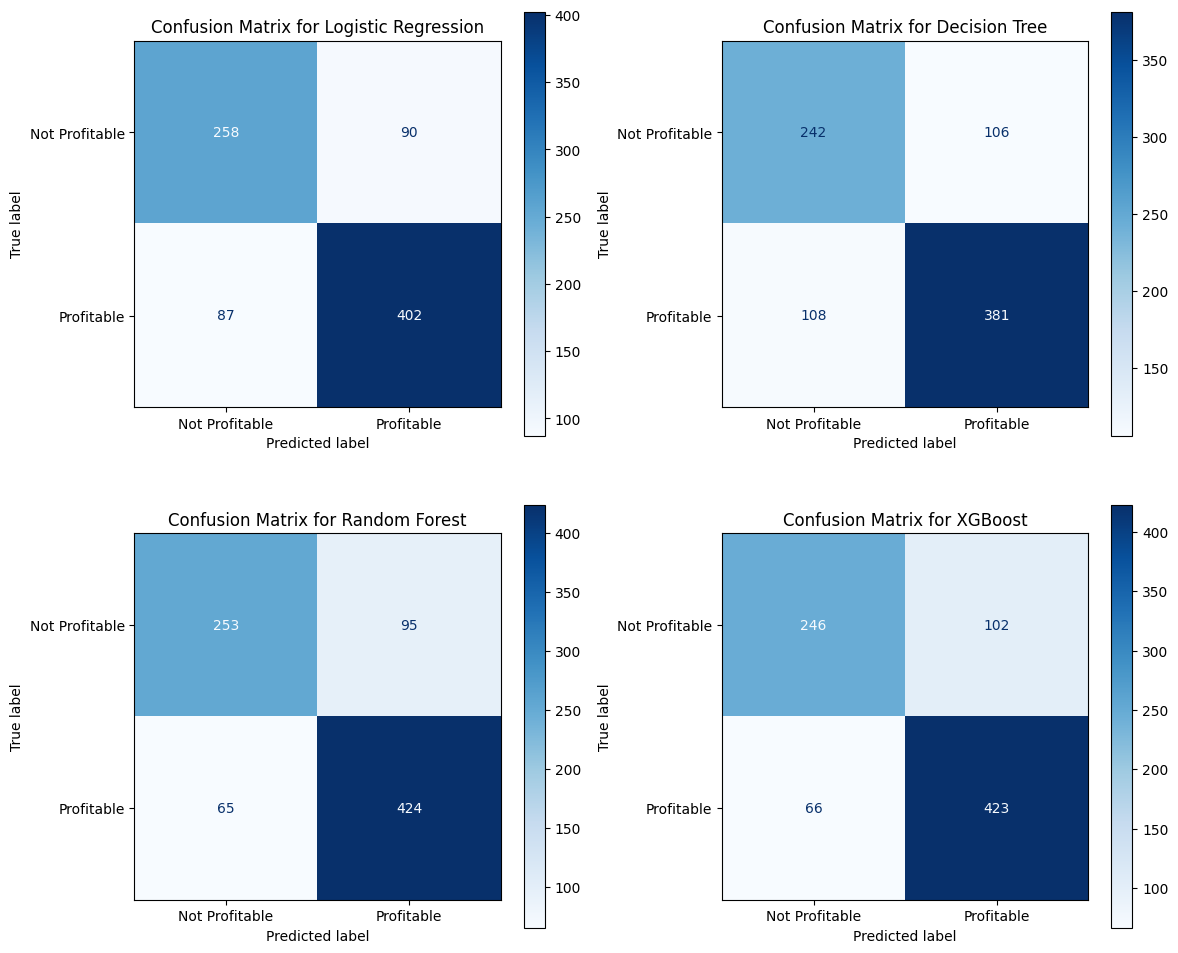

In [62]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate over each model
for idx, (name, model) in enumerate(models.items()):
    # Calculate subplot position
    row = idx // 2
    col = idx % 2

    # Plot confusion matrix
    ax = axes[row, col]
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                                 display_labels=["Not Profitable", "Profitable"],
                                                 cmap=plt.cm.Blues, ax=ax, normalize=None)
    disp.ax_.set_title(f'Confusion Matrix for {name}')

# Adjust layout
plt.tight_layout()
plt.show()


Based on the confusion matrices for each model:

- **XGBoost:** This model correctly classified 246 instances as not profitable (True Negatives) and 423 instances as profitable (True Positives). However, it misclassified 102 instances as profitable when they were not (False Positives) and 66 instances as not profitable when they were (False Negatives).

- **Random Forest:** Similar to XGBoost, Random Forest correctly classified 253 instances as not profitable and 424 instances as profitable. It misclassified 95 instances as profitable when they were not and 65 instances as not profitable when they were.

- **Logistic Regression:** Logistic Regression correctly classified 258 instances as not profitable and 402 instances as profitable. However, it misclassified 90 instances as profitable when they were not and 87 instances as not profitable when they were.

- **Decision Trees:** Decision Trees correctly classified 242 instances as not profitable and 381 instances as profitable. It misclassified 106 instances as profitable when they were not and 108 instances as not profitable when they were.

Overall, while all models achieved reasonable accuracy, Random Forest performed the best in terms of minimizing misclassifications, followed closely by XGBoost. Logistic Regression and Decision Trees exhibited slightly weaker performance, with a higher number of misclassifications compared to Random Forest and XGBoost.

This code segment generates a Receiver Operating Characteristic (ROC) curve for each model in the models dictionary. The ROC curve illustrates the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity) for different classification thresholds. Each curve is labeled with the corresponding model name and its Area Under the Curve (AUC) score. The gray dashed line represents a random classifier. The plot helps visualize the performance of each model in terms of their ability to correctly classify positive and negative instances across various threshold values.

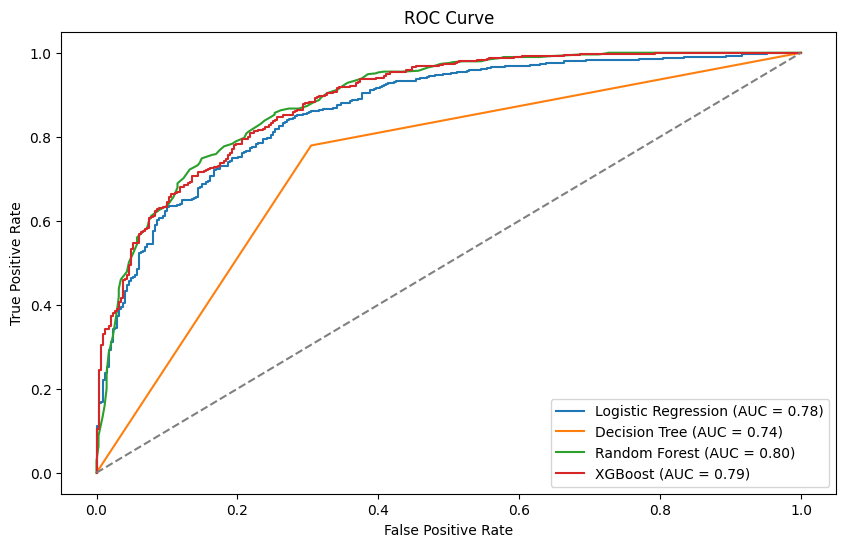

In [63]:
# ROC-AUC Plot
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["ROC-AUC"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

This code segment extracts the AUC (Area Under the Curve) scores for each model from the results dictionary and visualizes them using a bar plot. Each bar represents the AUC score of a specific model, with different colors distinguishing between models. The plot provides a comparative view of the AUC performance across different models, aiding in model selection and evaluation.

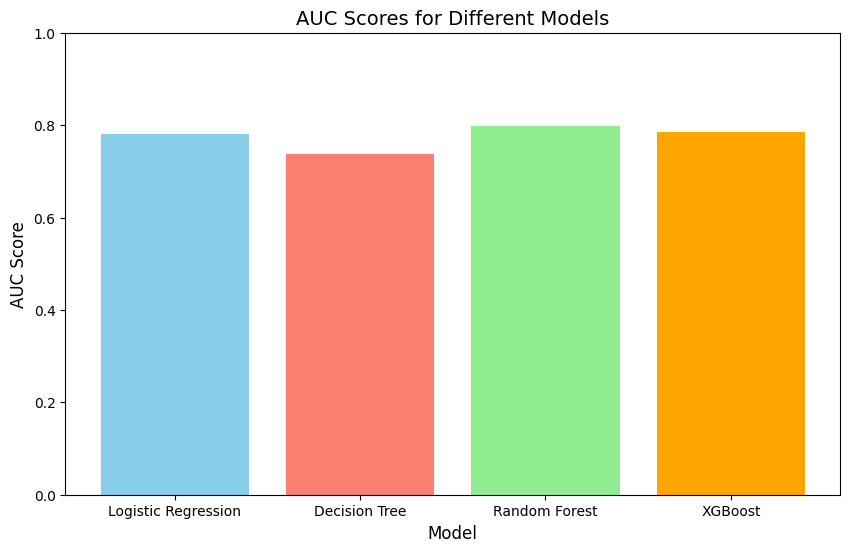

In [64]:
# Extract AUC scores
auc_scores = [results[name]["ROC-AUC"] for name in models]

# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plot AUC scores
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), auc_scores, color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('AUC Score', fontsize=12)
plt.title('AUC Scores for Different Models', fontsize=14)
plt.ylim(0, 1)
plt.show()


Decision Trees have the weakest performance, with a lower AUC score compared to the other models. Conversely, Logistic Regression, Random Forest, and XGBoost exhibit similar performance, with Random Forest demonstrating the highest AUC score among them.

Among the models evaluated, the **Random Forest** model demonstrated the highest overall performance with the highest accuracy, precision, recall, F1-score, and ROC-AUC. This suggests that Random Forest is the most effective model for predicting movie profitability based on the selected features. However, further fine-tuning and experimentation with hyperparameters could potentially improve the performance of the models even further.

# <a id='toc8_'></a>[Recommender System](#toc0_)